#Prasad Jawale RL Experiment 4 - MAB using upper confidence bound


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def choose_action(q_values, action_counts, step, c):
    exploration_bonus = c * np.sqrt(np.log(step + 1) / (action_counts + 1e-5))
    ucb_values = q_values + exploration_bonus
    return np.argmax(ucb_values)

In [ ]:
def update(q_values, action, reward, action_counts):
    action_counts[action] += 1
    q_values[action] += (reward - q_values[action]) / action_counts[action]

In [ ]:
def bandit_simulation(num_arms, num_steps, c):
    q_values = np.zeros(num_arms) # Initialize q-values with zeros
    action_counts = np.zeros(num_arms)
    rewards = []
    optimal_actions = []
    avg_rewards = []
    optimal_action_percentages = []

    q_true = np.random.normal(0, 1, num_arms) # True values of the q-values

    for step in range(num_steps):
        action = choose_action(q_values, action_counts, step, c)
        reward = np.random.normal(q_true[action], 1) # Reward drawn from a normal distribution
        update(q_values, action, reward, action_counts)
        rewards.append(reward)
        optimal_actions.append(action == np.argmax(q_true))
        avg_rewards.append(np.mean(rewards))
        optimal_action_percentages.append(np.mean(optimal_actions))

    return rewards, optimal_actions, avg_rewards, optimal_action_percentages

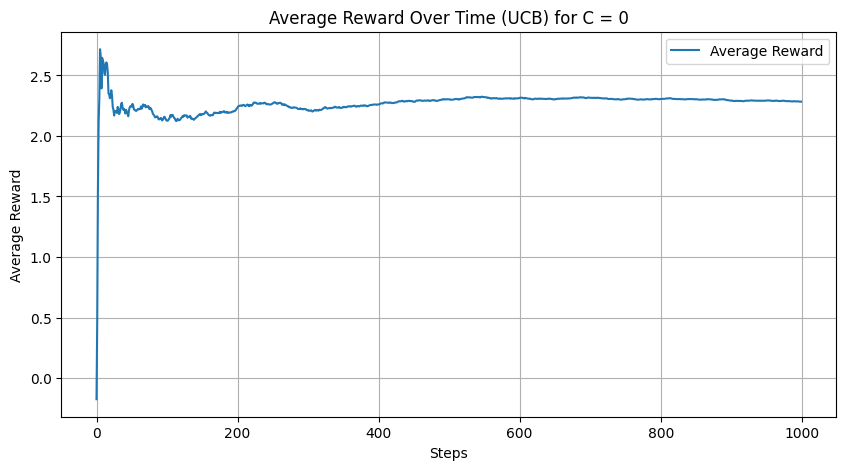

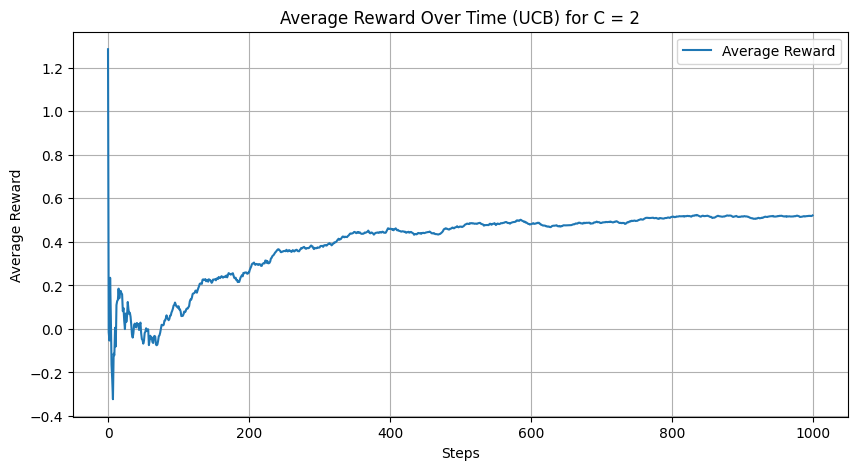

In [ ]:
num_arms = 10
num_steps = 1000
c = 2.0 # UCB exploration parameter


c_values = [0,2]
for c in c_values:
    rewards, optimal_actions, avg_rewards, optimal_action_percentages = bandit_simulation(num_arms, num_steps, c)

    # Plot average reward
    plt.figure(figsize=(10, 5))
    plt.plot(avg_rewards, label='Average Reward')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward Over Time (UCB) for C = '+str(c))
    plt.legend()
    plt.grid(True)
    plt.show()
